<a href="https://colab.research.google.com/github/cathemesquita/Colab_notebooks/blob/main/CCM497_SCREEN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install open-ephys-python-tools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.6/380.6 kB 12.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for open-ephys-python-tools: filename=open_ephys_python_tools-0.1.4-py3-none-any.whl size=38789 sha256=e95799e8a7fcaed5d141d47cb2f4d44936bda7de5afeff91e5e8a707b9ad7532
  Stored in directory: /root/.cache/pip/wheels/41/31/b0/98896ac5a95a729ddd3ec0e315d3d67a0396b9a586b4616adb
  Created wheel for zmq: filename=zmq-0.0.0-py3-none-any.whl size=1264 sha256=dfd8d1698d56094713da4c5adf748c1a2bd4ba5048bb37167b72b0722c8ec655
  Stored in directory: /root/.cache/pip/wheels/ab/c5/fe/d853f71843cae26c123d37a7a5934baac20fc66f35a913951d
Successfully built open-ephys-python-tools zmq


In [ ]:
from open_ephys.analysis import Session

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import scipy as sp
from scipy import signal
import math
from scipy.signal import welch, spectrogram, coherence, find_peaks, firwin, lfilter, filtfilt, hilbert
import seaborn as sn
import scipy.signal as sig
from scipy.stats import wilcoxon

import math
import time as ttime
from numpy.fft import fft, ifft, rfft, fftfreq
from scipy.signal import firwin, lfilter, filtfilt
from scipy.io import loadmat

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
CCM497 = {'screening':'/content/drive/Shareddrives/Registros open ephys Desamparo/Registros desamparo open ephys/Experimento Ephys/Dia 2 - Screening 16 12 22/Screening/CCM497',
          'OF pre screenig':'/content/drive/Shareddrives/Registros open ephys Desamparo/Registros desamparo open ephys/Experimento Ephys/Dia 2 - Screening 16 12 22/OF pré-screening/CCM497',
          'OF pos screening':'/content/drive/Shareddrives/Registros open ephys Desamparo/Registros desamparo open ephys/Experimento Ephys/Dia 2 - Screening 16 12 22/OF pós-screening/CCM497',
          'CS': '/content/drive/Shareddrives/Registros open ephys Desamparo/Registros desamparo open ephys/Experimento Ephys/Dia 3 - CS 19 12 22/CS/CCM497',
          'OF pre CS':'/content/drive/Shareddrives/Registros open ephys Desamparo/Registros desamparo open ephys/Experimento Ephys/Dia 3 - CS 19 12 22/OF pré-CS/CCM497',
          'OF pos CS': '/content/drive/Shareddrives/Registros open ephys Desamparo/Registros desamparo open ephys/Experimento Ephys/Dia 3 - CS 19 12 22/OF pós-CS/CCM497',
          'HOME CAGE':'/content/drive/Shareddrives/Registros open ephys Desamparo/Registros desamparo open ephys/Experimento Ephys/Dia 3 - CS 19 12 22/HomeCage pós OF pós CS/CCM497',
          'OF dia 4':'/content/drive/Shareddrives/Registros open ephys Desamparo/Registros desamparo open ephys/Experimento Ephys/Dia 4 - OF 20 12 22/CCM497',
          'OF dia 5':'/content/drive/Shareddrives/Registros open ephys Desamparo/Registros desamparo open ephys/Experimento Ephys/Dia 5 - OF 21 12 22/CCM497',
          'OF dia 6':'/content/drive/Shareddrives/Registros open ephys Desamparo/Registros desamparo open ephys/Experimento Ephys/Dia 6 - OF 22 12 22/CCM497'}

In [ ]:

# fc = 50  # Cutoff frequency for lowpass filt

# # definir a ordem do filtro
# order = 5

# fs = 1000

# b, a = signal.butter(order, fc / (fs / 2), 'lowpass') #filtra >90hz

In [ ]:
# order = 5
# # definir as frequências de corte do filtro

# fc_low = 4
# fc_high = 10

# #  filtro Butterworth
# b, a = signal.butter(order, [fc_low/(0.5*1000), fc_high/(0.5*1000)], btype='bandpass')

In [ ]:
# lowcut = 0.5  # Lower cutoff frequency in Hz
# highcut = 4  # Higher cutoff frequency in Hz

# # Convert the cutoff frequencies to radians per second
# lowcut_rad = lowcut * 2 * np.pi
# highcut_rad = highcut * 2 * np.pi

# # Design the bandpass filter using a Butterworth filter
# order = 5  # Filter order
# sos = signal.butter(order, [lowcut_rad, highcut_rad], btype='band', fs=1000, output='sos')

# # Apply the bandpass filter to the signal
# # filtered_data = signal.sosfilt(sos, data)

In [ ]:


# Assuming your signal is stored in the 'data' variable
# Assuming the sampling frequency is stored in the 'sampling_freq' variable

# Define the frequency range of the bandpass filter
lowcut = 4  # Lower cutoff frequency in Hz
highcut = 10  # Higher cutoff frequency in Hz

# Convert the cutoff frequencies to fractions of the Nyquist frequency
normalized_lowcut = lowcut / (0.5 * 1000)
normalized_highcut = highcut / (0.5 * 1000)

# Design the bandpass filter using a Butterworth filter
order = 4  # Filter order
b, a = signal.butter(order, [normalized_lowcut, normalized_highcut], btype='band')

# Apply the bandpass filter to the signal


In [ ]:
session = Session(CCM497['screening'])
rn = session.recordnodes[0].recordings[0] #selecionando o record node desejado
t_raw= rn.continuous[0].timestamps
t = t_raw-t_raw[0] # Ajustando o vetor de timestamps para iniciar em zero e ter o mesmo tamanho do dado
start_sample = 0 # início do sinal
end_sample = len(t) # fim do sinal
data = rn.continuous[0].get_samples(start_sample_index=start_sample, end_sample_index=end_sample) #extraindo os dados

In [ ]:
# excluindo os canais do acelerômetro da análise
lista_sinais = [] # vai guardar os 32 canais raw

for i in range(32):
  lista_sinais.append(data[:,[i]])

# filtrando os dados
lista_filt = [] # guarda o SINAL FILTRADO: 60Hz E >90

for n in range(32):
    x = lista_sinais[n]
    xf = x - np.mean(x)
    filter =  signal.lfilter(b, a, xf.transpose())
    # filter = signal.sosfilt(sos, xf.transpose())
    # xf = signal.filtfilt(b, a, xf.transpose())
    # xff = signal.lfilter(d, c, xf.transpose())
    lista_filt.append(filter[0])

In [ ]:
# CS CUT
lista_CS = []
event = rn.events
CS = event[(event['line'] ==2)&(event['state']==1)] # Listando todos os momentos em que a luz acendeu
CS_samplenumber = list((CS['sample_number']-t_raw[0]*1000).astype(int))
inicio = 0
final = 0

for c in range(len(lista_filt)): #cortando o dado 5s antes e 5s após o CS
  CS_cut = []
  for sn in CS_samplenumber:
     inicio = sn-5000
     final = sn+5000
     cut = np.array(lista_filt[c][inicio:final])
     CS_cut.append(cut)
  lista_CS.append(CS_cut)

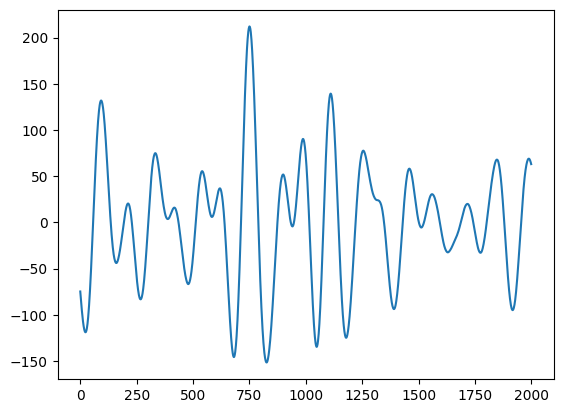

In [ ]:
plt.plot(lista_CS[2][0][0:2000])

Relative PSD was calculated by dividing the mean PSD estimates by the sum of the averaged pre-CS PSD below 50 Hz.

---



In [ ]:
# ANÁLISE ESPECTRAL PRE CS
canais_preCS = []

espectrogramCS = []
trials_ruins = [21]

for ch in range(32):
    espectros_preCS = []
    for cs in range(30):
      if cs in trials_ruins:
        continue
      f_pre, p_pre = welch(lista_CS[ch][cs][:5000], fs=1000, nperseg=1000, noverlap=int(0.9*1000))
      p_pre = p_pre/np.mean(p_pre)
      espectros_preCS.append(p_pre)
    canais_preCS.append(espectros_preCS)

soma = 0
for i in range(len(canais_preCS[2])):
   soma += canais_preCS[2][i]

media_pre = soma / len(canais_preCS[2])

sdmn_pre = sp.stats.sem(media_pre)


In [ ]:
# ANÁLISE ESPECTRAL POS CS
canais_posCS = []



for ch in range(32):
    espectros_posCS = []
    for cs in range(30):
      if cs in trials_ruins:
        continue
      f_pos, p_pos = welch(lista_CS[ch][cs][5000:], fs=1000, nperseg=1000, noverlap=int(0.9*1000))
      p_pos = p_pos/np.mean(p_pos)
      espectros_posCS.append(p_pos)
    canais_posCS.append(espectros_posCS)

soma = 0
for i in range(len(canais_posCS[2])):
    soma += canais_posCS[2][i]

media_pos = soma / len(canais_posCS[2])

sdmn_pos = sp.stats.sem(media_pos)

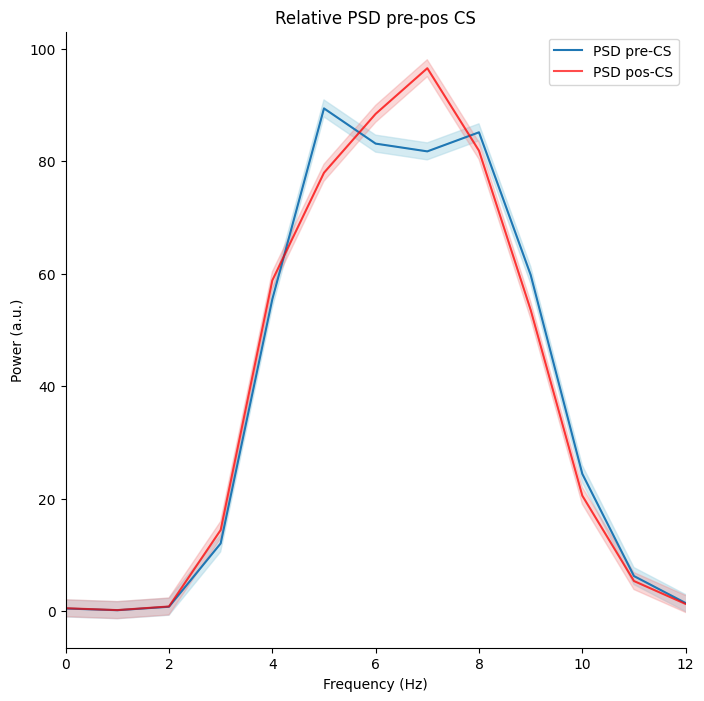

In [ ]:

plt.figure (figsize=(8,8))
plt.title('Relative PSD pre-pos CS')

plt.plot(f_pre, 10**(10*np.log10(media_pre)/10) , label='PSD pre-CS')

plt.fill_between(f_pre,10**(10*np.log10(media_pre)/10),  10**(10*np.log10(media_pre)/10) + 4*sdmn_pre, color = 'lightblue', alpha=0.5)
plt.fill_between(f_pre,10**(10*np.log10(media_pre)/10),  10**(10*np.log10(media_pre)/10) - 4*sdmn_pre, color = 'lightblue', alpha=0.5)


plt.plot(f_pos, 10**(10*np.log10(media_pos)/10), color='red', label='PSD pos-CS', alpha=0.7)


plt.fill_between(f_pos,10**(10*np.log10(media_pos)/10),  10**(10*np.log10(media_pos)/10) + 4*sdmn_pre, color = 'lightcoral', alpha=0.3)
plt.fill_between(f_pos,10**(10*np.log10(media_pos)/10),  10**(10*np.log10(media_pos)/10) - 4*sdmn_pre, color = 'lightcoral', alpha=0.3)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend()
plt.xlim(0,12)
# plt.ylim(0,50)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (a.u.)')
plt.show()

<BarContainer object of 501 artists>

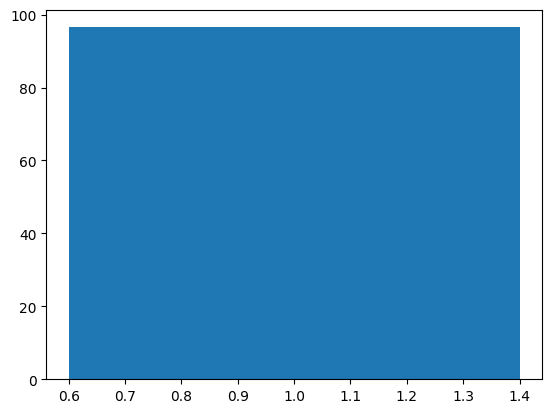

In [ ]:
plt.bar(1,10**(10*np.log10(media_pos)/10))

In [ ]:
pip install statsmodels


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import ttest_rel
from scipy.stats import skew, kurtosis



In [ ]:
skewness = skew(media_pre)
kurt = kurtosis(media_pre)

# Print the results
print("Skewness:", skewness)
print("Kurtosis:", kurt)

Skewness: 9.084329516174302
Kurtosis: 83.24838438337136


In [ ]:



# Perform the Lilliefors test
statistic, p_value = lilliefors(media_pre)

# Print the test result
print("Lilliefors test statistic:", statistic)
print("Lilliefors p-value:", p_value)
if p_value < 0.05:
  print('The data is not Normally distribuited')

Lilliefors test statistic: 0.5144355980167375
Lilliefors p-value: 0.0009999999999998899
The data is not Normally distribuited


In [ ]:

# before = 10**(10*np.log10(media_pre)/10)
# after = 10**(10*np.log10(media_pos)/10)

before = media_pre
after = media_pos
statistic, p_value = wilcoxon(before, after)
# Print the test statistic and p-value
print("Wilcoxon signed-rank test statistic:", statistic)
print("P-value:", p_value)

Wilcoxon signed-rank test statistic: 39615.0
P-value: 7.246825537942307e-13


{'whiskers': [<matplotlib.lines.Line2D at 0x7fd001fd0250>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd001fd0790>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd002193f70>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd001fd0cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd001fd0f70>],
 'means': []}

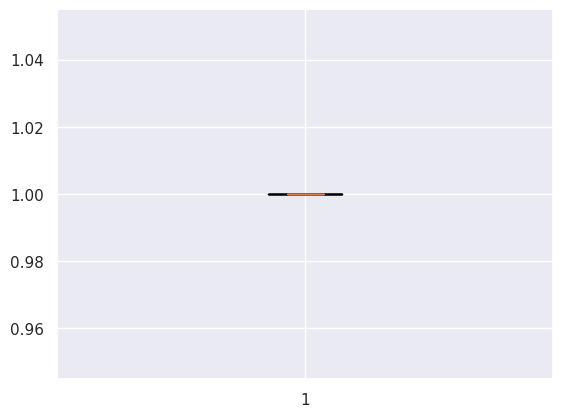

In [ ]:
plt.boxplot([1 ],  [media_pre])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above)
sns.set(style="darkgrid")


sns.boxplot(x = [1 , 2], y = [before, after] , palette="Blues")
plt.show()

TypeError: ignored

In [ ]:

# ESPECTROGRAMA DO CS

trials_ruins = [21]
espectrogram_CS = []
for ch in range(32):
      ch_pre = []
      for cs in range(30):
          if cs in trials_ruins:
            continue
          f_espec, t_espec, s_espec = spectrogram(lista_CS[ch][cs], fs=1000, nperseg=1500, noverlap=int(0.9*1500))
          s_espec = (s_espec/np.mean(s_espec))
          ch_pre.append(s_espec)
      espectrogram_CS.append(ch_pre)

In [ ]:
soma = 0

for i in range(len(espectrogram_CS[2])):
    soma += espectrogram_CS[2][i]

media_pos_espec = soma / len(espectrogram_CS[2])

sdmn_pos = sp.stats.sem(media_pos_espec)

In [ ]:
len(espectrogram_CS[0])

29

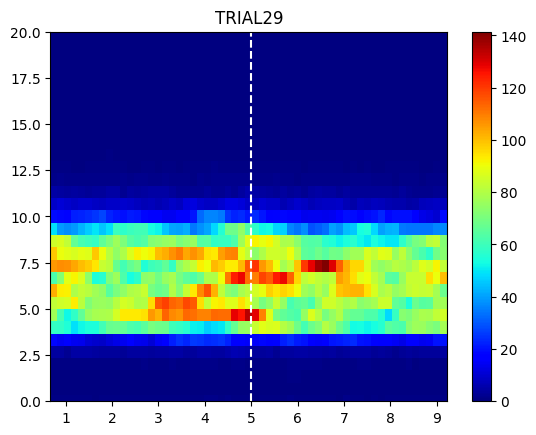

In [ ]:
plt.figure()
plt.pcolormesh(t_espec, f_espec, media_pos_espec, cmap = 'jet')
plt.ylim(0,20)
plt.title( 'TRIAL' + str(i+1))
plt.axvline(x=5.0, color = 'white', linestyle = '--')
plt.colorbar()

In [ ]:
concatenados = []
for i in range(30):
    concatenados.append(espectrogram_preCS[2][i])

resultado = (np.concatenate(concatenados))


NameError: ignored

In [ ]:
len(resultado)

In [ ]:
for i in range(30):
  plt.figure()
  plt.title('trial'+str(i+1))
  plt.plot(canais_preCS[2][i])
  plt.xlim(0,20)

In [ ]:
for i in range(30):
  plt.figure()
  plt.pcolormesh(t_espec, f_espec, espectrogram_preCS[2][i])
  plt.ylim(0,20)
  plt.title( 'TRIAL' + str(i+1))
  plt.axvline(x=5.0, color = 'white', linestyle = '--')
  plt.colorbar()

In [ ]:


for i in range(30):
  plt.figure()
  plt.title('trial'+str(i+1))
  plt.plot(lista_CS[2][i])
  plt.axvline(x=5000, color = 'red', linestyle = '--')
  # plt.xlim(0,20)